# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [28]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'
augmented_training_file = './traffic-signs-data/augmented_training_file.p'

def load_image(file):
    with open(file, mode='rb') as f:
        data = pickle.load(f)
    X, y = data['features'], data['labels']
    assert(len(X) == len(y))
    return X, y
    
X_train, y_train = load_image(training_file)
X_valid, y_valid = load_image(validation_file)
X_test, y_test = load_image(testing_file)


print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import csv
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

y_names = {}
with open("signnames.csv", "r") as sgn_file:
    sign_reader = csv.DictReader(sgn_file)
    print("Signs: ")
    for row in sign_reader:
        print()
        print(int(row['ClassId']), row['SignName'])
        y_names[int(row['ClassId'])] = row['SignName']

def get_name(index):
    return "[" + str(index) + "-" + y_names[index] + "]"

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Signs: 

0 Speed limit (20km/h)

1 Speed limit (30km/h)

2 Speed limit (50km/h)

3 Speed limit (60km/h)

4 Speed limit (70km/h)

5 Speed limit (80km/h)

6 End of speed limit (80km/h)

7 Speed limit (100km/h)

8 Speed limit (120km/h)

9 No passing

10 No passing for vehicles over 3.5 metric tons

11 Right-of-way at the next intersection

12 Priority road

13 Yield

14 Stop

15 No vehicles

16 Vehicles over 3.5 metric tons prohibited

17 No entry

18 General caution

19 Dangerous curve to the left

20 Dangerous curve to the right

21 Double curve

22 Bumpy road

23 Slippery road

24 Road narrows on the right

25 Road work

26 Traffic signals

27 Pedestrians

28 Children crossing

29 Bicycles crossing

30 Beware of ice/snow

31 Wild animals crossing

32 End of all speed and passing limits

33 Turn right ahead

34 Turn left ahead

35 Ahead only

36 Go straight or rig

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

18


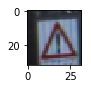

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def display_random_image(X,y):
    index = random.randint(0, len(X)-1)
    image = X[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(y[index])

display_random_image(X_train, y_train)    

### Data Distribution

From below distribution we can see that the data in each set is quite skewed. This has to be kept in mind while creating a Training Model.

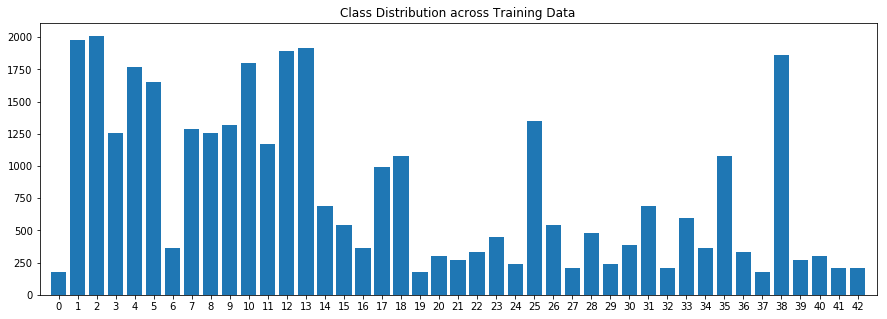

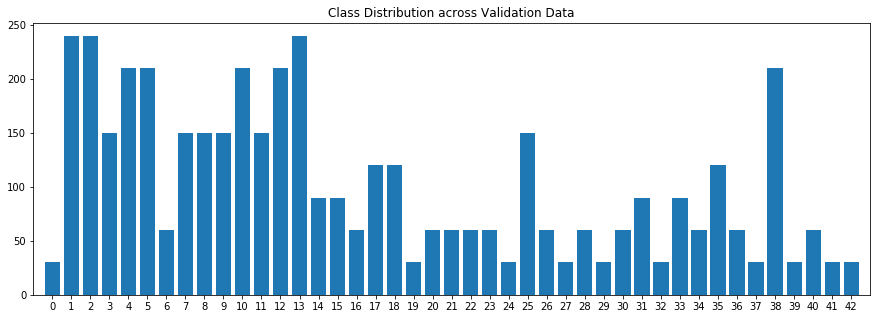

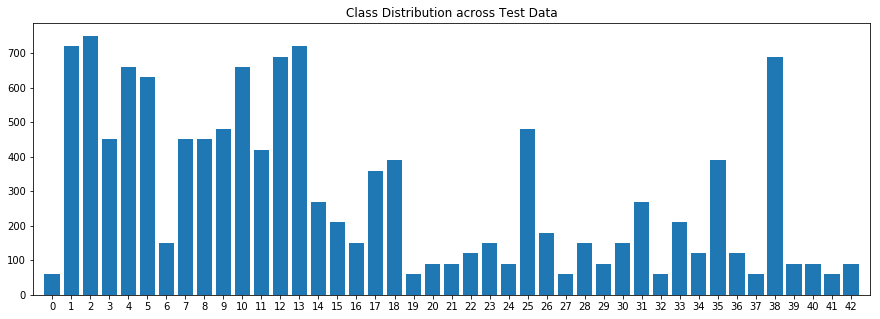

In [4]:
import numpy as np

def plot_data_dist(y, dataset_name):
    # Count frequency of each label
    labels, counts = np.unique(y, return_counts=True)
    # Plot the histogram
    plt.rcParams["figure.figsize"] = [15, 5]
    axes = plt.gca()
    axes.set_xlim([-1,43])

    plt.bar(labels, counts, tick_label=labels, width=0.8, align='center')
    plt.title('Class Distribution across {} Data'.format(dataset_name))
    plt.show()

plot_data_dist(y_train, 'Training')
plot_data_dist(y_valid, 'Validation')
plot_data_dist(y_test, 'Test')

### Augment Data
In order to reduce the skewness of training set some distortion are done to the train set by picking up images at random.

In [5]:
import cv2
from functools import partial
import tensorflow as tf

ANGLE = 45
TRANSLATION_FACTOR = 0.5

distortions = [
    partial(tf.image.random_brightness, max_delta=50),
    partial(tf.image.random_flip_up_down),
    partial(tf.image.random_flip_left_right),
    partial(tf.image.random_hue, max_delta=0.10),
    partial(tf.image.random_contrast, lower=0, upper=10),
    partial(tf.image.random_saturation, lower=0, upper=10)
]

def distort_image(image):
    index = int(np.random.uniform()*len(distortions))
    new_image = distortions[index](image = image)
    x_aug_variable = tf.placeholder(tf.float32, image.shape)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        x_aug = sess.run(new_image, {x_aug_variable: image})
    return x_aug

def aug_data(X,y):
    print('Augmenting data with random transformations')
    # Increase the number of images
    for i in range(len(X)):
        # Pick a random image from original dataset to transform
        rand_idx = np.random.randint(X.shape[0])

        # Create new image
        image = distort_image(X[rand_idx])

        # Add new data to augmented dataset
        if i == 0:
            new_X = np.expand_dims(image, axis=0)
            new_y = np.array([y[rand_idx]])
        else:
            new_X = np.concatenate((new_X, np.expand_dims(image, axis=0)))
            new_y = np.append(new_y, y[rand_idx])
            
        if (i+1)%100 == 0:
            print('Augmented {} images'.format(i+1))
        
    new_X = np.concatenate((X, new_X))
    new_y = np.concatenate((y, new_y))
    new_data = {'features': new_X, 'labels': new_y}
    with open(augmented_training_file, mode='wb') as f:
        pickle.dump(new_data, f)
    print('Augmentation Complete')

aug_data(X_train, y_train)

Augmenting data with random transformations
Augmentation Complete


Data is sugmented and distribution is analysed again.


Image Shape: (32, 32, 3)



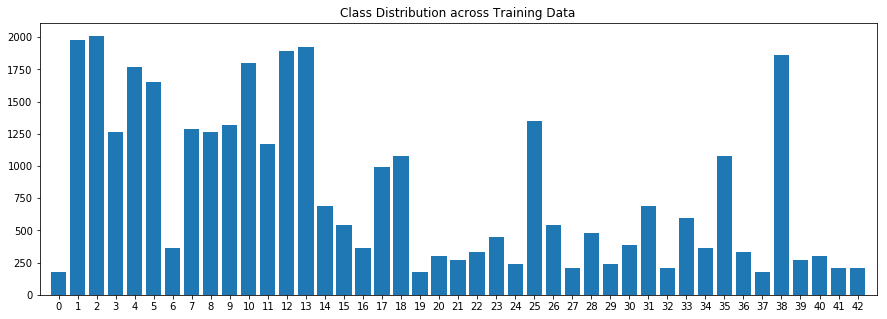

In [29]:
X_train, y_train = load_image(augmented_training_file)
print()
print("Image Shape: {}".format(X_train[0].shape))
print()
plot_data_dist(y_train, 'Training')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2
import numpy as np

X_train, y_train = shuffle(X_train, y_train)

def plot_image(images, title=""):
    plt.figure(figsize=(len(images)*2, 2))
    plt.title(title)
    if(len(images[0].shape) > 2 and images[0].shape[2] > 1):
        plt.imshow(np.hstack(images))
    else:
        plt.imshow(np.hstack([i.squeeze() for i in images]), cmap='gray')
    plt.show()
    
def preprocess(img):
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # We normalize in order to deal with overly bright or overly dark pictures
    norm_image = cv2.normalize(gray_image, np.zeros(gray_image.shape), 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    return np.stack([norm_image], axis = -1)

def preprocess_list(images):
    processed_images = [preprocess(img) for img in images]
    return np.array(processed_images).reshape((images.shape[0],) + processed_images[0].shape)

print("Shape before preprocessing: ", X_train.shape)
processed_X_train = preprocess_list(X_train)
processed_y_train = np.copy(y_train)
print("Shape after preprocessing: ", processed_X_train.shape)
    
    
processed_X_valid = preprocess_list(X_valid)
processed_y_valid = np.copy(y_valid)

Shape before preprocessing:  (34810, 32, 32, 3)
Shape after preprocessing:  (34810, 32, 32, 1)


### Validate Processed Image

Image index:  17698


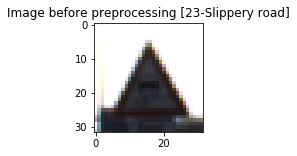

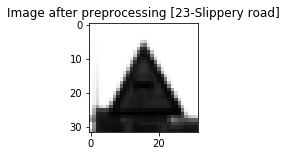

In [8]:
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


index = random.randint(0, len(X_train)-1)
print("Image index: ", index)

plot_image([X_train[index]], "Image before preprocessing " + get_name(y_train[index]))
plot_image([processed_X_train[index]], "Image after preprocessing " + get_name(processed_y_train[index]))

In [9]:
EPOCHS = 30
BATCH_SIZE = 128

model = './models/ccnet'

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

MU = 0
SIGMA = 0.1

keep_prob = tf.placeholder(tf.float32)

def conv(
    x, 
    depth, 
    filter_shape_x,
    filter_shape_y,
    filter_depth,
    stride_x,
    stride_y
):
    # Convolution
    layer_w = tf.Variable(tf.truncated_normal(shape=(filter_shape_x,filter_shape_y, depth, filter_depth), mean = MU, stddev = SIGMA))
    layer_b = tf.Variable(tf.zeros(filter_depth))
    layer  = tf.nn.conv2d(x, layer_w, strides=[1, stride_x, stride_y, 1], padding='VALID') + layer_b
    #Activation.
    layer = tf.nn.relu(layer)
    return layer

def avg_pool(
    x, 
    ksize, 
    stride_x, 
    stride_y
):
    return tf.nn.avg_pool(x, ksize, strides=[1, stride_x, stride_y, 1], padding='VALID')

def fully_connected_network(
    x, 
    input_x, 
    input_y
):
    fc_W = tf.Variable(tf.truncated_normal(shape=(input_x, input_y), mean = MU, stddev = SIGMA))
    fc_b = tf.Variable(tf.zeros(input_y))
    fc   = tf.matmul(x, fc_W) + fc_b
    
    return fc

def activation(x):
    return tf.nn.relu(x)

def dropout(x):
    return tf.nn.dropout(x, keep_prob)
    
def CNNet(x):    
    """Architecture for CNN
    """
    #Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x6.
    layer1 = conv(x, 1, 3, 3, 6, 1, 1)
    
    #Layer 2: Convolutional. Input = 30x30x3. Output = 28x28x12.
    layer2 = conv(layer1, 6, 3, 3, 12, 1, 1)
    
    # Average Pooling. Input = 28x28x12. Output = 14x14x12.
    layer2 = avg_pool(layer2, ksize=[1, 2, 2, 1], stride_x=2, stride_y=2)
    
    #Layer 3: Convolutional. Input = 14x14x12. Output = 10x10x32.
    layer3 = conv(layer2, 12, 5, 5, 32, 1, 1)
    
    # Average Pooling. Input = 10x10x32. Output = 5x5x32.
    layer3 = avg_pool(layer3, ksize=[1, 2, 2, 1], stride_x=2, stride_y=2)
    
    #Flatten. Input = 5x5x32. Output = 800.
    flat_data   = flatten(layer3)
    
    #Layer 4: Fully Connected. Input = 800. Output = 240.
    layer4 = fully_connected_network(flat_data, 800, 240)
    #Activation.
    layer4 = activation(layer4)
    
    #Layer 5: Fully Connected. Input = 240. Output = 168.
    layer5 = fully_connected_network(layer4, 240, 168)
    #Activation.
    layer5 = activation(layer5)
    
    #Dropout
    dop = dropout(layer5)
    #Layer 6: Fully Connected. Input = 168. Output = 43.
    logits   = fully_connected_network(dop, 168, 43)
    
    return logits

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [12]:
rate = 0.001

logits = CNNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Evaluate

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
predicted_values = tf.argmax(logits, 1)
actual_values = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

tp = np.zeros(43)
fp = np.zeros(43)
fn = np.zeros(43)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_prediction = np.zeros(43)
    total_actual = np.zeros(43)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        prediction, actual, accuracy = sess.run([predicted_values, actual_values, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        batch_prediction_count = np.bincount(prediction, minlength=43)
        batch_actual_count = np.bincount(actual, minlength=43)
        total_prediction += batch_prediction_count
        total_actual += batch_actual_count
        total_accuracy += (accuracy * len(batch_x))
        for p, a in zip(prediction, actual):
            if p == a:
                tp[p] += 1
            else:
                fp[p] += 1
                fn[a] += 1
    
    # 1 - Perfect match
    # < 1 - Underfitting
    # > 1 - Overfitting
    match_percentage = np.round(np.abs(total_prediction/total_actual), decimals=3)
    precision = np.round(tp/(tp+fp), decimals=3)
    recall = np.round(tp/(tp+fn), decimals=3)
    print("Match percentage: ", match_percentage)
    print("Precision: ", precision)
    print("Recall: ", recall)
    return match_percentage, precision, recall, total_accuracy / num_examples

def show_results(match_percentage, precision, recall):
    op_format = "{:7}{:50}{:>18}{:>10}{:>10}"
    print(op_format.format("S.No", "Name", "Match Percentage", "Precision", "Recall"))
    for i, (m, p, r) in enumerate(zip(match_percentage, precision, recall)):
        print(op_format.format(str(i), y_names[i], m, p, r))

### Training the model

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(processed_X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        processed_X_train, processed_y_train = shuffle(processed_X_train, processed_y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = processed_X_train[offset:end], processed_y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        validation_match_percentage, validation_precision, validation_recall,validation_accuracy = evaluate(processed_X_valid, processed_y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, model)
    print("Model saved")
show_results(validation_match_percentage, validation_precision, validation_recall)

Training...

Match percentage:  [ 0.6    0.888  1.333  0.953  1.186  0.929  1.     0.833  0.787  0.92
  1.195  1.24   1.019  0.992  1.044  1.     1.05   0.867  1.6    1.467
  1.317  0.333  0.333  0.883  1.3    0.873  0.4    0.133  1.9    0.133  0.3
  0.944  1.867  0.889  0.333  1.067  0.85   1.4    1.19   1.133  1.     0.967
  0.467]
Precision:  [ 0.778  0.887  0.666  0.874  0.779  0.774  0.867  0.8    0.737  0.928
  0.837  0.737  0.935  0.975  0.84   0.889  0.937  0.942  0.568  0.659
  0.506  0.45   1.     0.528  0.231  0.908  0.667  0.25   0.526  1.     0.667
  0.882  0.518  0.988  0.95   0.922  0.922  0.667  0.792  0.882  0.833
  0.655  0.929]
Recall:  [ 0.467  0.788  0.888  0.833  0.924  0.719  0.867  0.667  0.58   0.853  1.
  0.913  0.952  0.967  0.878  0.889  0.983  0.817  0.908  0.967  0.667
  0.15   0.333  0.467  0.3    0.793  0.267  0.033  1.     0.133  0.2    0.833
  0.967  0.878  0.317  0.983  0.783  0.933  0.943  1.     0.833  0.633
  0.433]
EPOCH 1 ...
Validation Accuracy 

### Evaluate Model

High Accuracy for both training and validation set indicates the model is right whereas, high accuracy on the training set and low accuracy on the validation set indicates that the model is overfitted to the training set.

In [15]:
with tf.Session() as sess:
    saver.restore(sess, model)
    sess = tf.get_default_session()
    training_match_percentage, training_precision, training_recall,training_accuracy = evaluate(processed_X_train, processed_y_train)
    validation_match_percentage, validation_precision, validation_recall,validation_accuracy = evaluate(processed_X_valid, processed_y_valid)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    show_results(validation_match_percentage, validation_precision, validation_recall)

Match percentage:  [ 1.006  0.999  1.     0.999  1.     1.002  1.     1.     1.     1.     1.
  1.     0.999  1.     1.003  1.     1.     1.     0.999  1.     0.997  1.
  1.     0.998  1.     1.026  1.     0.995  1.     0.904  1.     0.99   1.
  0.998  1.     0.999  1.     1.     1.     1.     1.     1.     1.   ]
Precision:  [ 0.951  0.957  0.935  0.967  0.917  0.938  0.979  0.952  0.944  0.988
  0.966  0.904  0.933  0.994  0.924  0.97   0.993  0.988  0.915  0.874
  0.858  0.898  0.996  0.805  0.874  0.922  0.871  0.865  0.899  0.79
  0.915  0.894  0.767  0.981  0.985  0.957  0.993  0.895  0.885  0.932
  0.907  0.768  0.96 ]
Recall:  [ 0.794  0.95   0.96   0.957  0.996  0.921  0.951  0.924  0.926  0.962
  0.998  0.987  0.989  0.994  0.969  0.97   0.746  0.92   0.952  0.964
  0.781  0.551  0.762  0.851  0.747  0.928  0.953  0.583  0.998  0.83
  0.894  0.963  0.96   0.925  0.62   0.997  0.958  0.953  0.99   0.993
  0.782  0.797  0.91 ]
Match percentage:  [ 0.9    0.954  0.983  0.98   1.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Test Model on test images

Image index:  5245


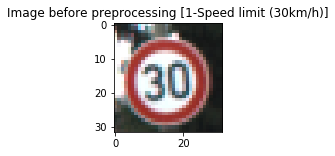

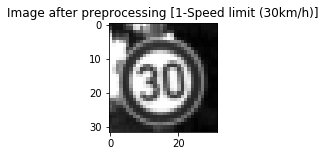

Match percentage:  [ 1.017  1.033  0.964  0.996  1.009  1.108  0.82   0.918  0.971  1.046
  1.011  0.914  1.025  1.001  1.033  1.029  1.007  0.953  1.015  1.083
  0.978  0.678  0.958  1.087  0.689  1.26   0.989  0.867  1.013  0.556
  0.907  0.941  1.05   1.01   1.033  0.956  0.842  1.15   1.022  0.978
  1.122  1.067  0.778]
Precision:  [ 0.952  0.957  0.94   0.967  0.92   0.932  0.98   0.952  0.944  0.985
  0.968  0.908  0.934  0.994  0.926  0.968  0.992  0.989  0.911  0.877
  0.864  0.904  0.991  0.813  0.874  0.901  0.868  0.847  0.9    0.801
  0.911  0.902  0.777  0.981  0.981  0.959  0.993  0.89   0.887  0.933
  0.899  0.759  0.962]
Recall:  [ 0.805  0.952  0.96   0.957  0.994  0.925  0.944  0.922  0.924  0.965
  0.998  0.978  0.989  0.993  0.969  0.97   0.756  0.925  0.946  0.967
  0.788  0.559  0.768  0.859  0.736  0.93   0.943  0.582  0.994  0.807
  0.885  0.959  0.963  0.929  0.632  0.992  0.953  0.949  0.988  0.988
  0.782  0.798  0.901]
Test Accuracy = 0.931
S.No   Name      

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


index = random.randint(0, len(X_test)-1)
print("Image index: ", index)

plot_image([X_test[index]], "Image before preprocessing " + get_name(y_test[index]))
preprocess_X_test = preprocess_list(X_test)
plot_image([preprocess_X_test[index]], "Image after preprocessing " + get_name(y_test[index]))

with tf.Session() as sess:
    saver.restore(sess, model)
    match_percentage, precision, recall, accuracy = evaluate(preprocess_X_test, y_test)  
    print("Test Accuracy = {:.3f}".format(accuracy))
    show_results(match_percentage, precision, recall)

### Load Images from Web

['./german-signs/1-30limit.png', './german-signs/14-Stop.png', './german-signs/23-SlipperyRoad.jpg', './german-signs/27-Pedestrians.png', './german-signs/8-120limit.jpg']
./german-signs/1-30limit.png :  (32, 32, 3)
./german-signs/14-Stop.png :  (32, 32, 3)
./german-signs/23-SlipperyRoad.jpg :  (32, 32, 3)
./german-signs/27-Pedestrians.png :  (32, 32, 3)
./german-signs/8-120limit.jpg :  (32, 32, 3)


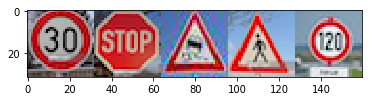

Y-values:  ['[1-Speed limit (30km/h)]', '[14-Stop]', '[23-Slippery road]', '[27-Pedestrians]', '[8-Speed limit (120km/h)]']


In [17]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import cv2
import os
from os import listdir
from os.path import isfile, join
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

def load_image(im_path):
    img = cv2.imread(f)
    b,g,r = cv2.split(img)
    img = cv2.merge((r,g,b))
    return img

web_files_dir = "./german-signs"
web_files = [join(web_files_dir, f) for f in listdir(web_files_dir) if isfile(join(web_files_dir, f)) and not f.startswith(".")]
print(web_files)


X_web_raw = []
y_web_raw = []
for f in web_files:
    img = load_image(f)
    print(f, ": ", img.shape)
    X_web_raw.append(img)

    _, file_name = os.path.split(f)
    y_web_raw.append(int(file_name.split("-")[0]))
    
    
plt.imshow(np.hstack(X_web_raw))
plt.show()

print("Y-values: ", [get_name(y_w) for y_w in y_web_raw])

### Pre Process web images

In [18]:
X_web = np.array(X_web_raw)
y_web = np.array(y_web_raw)

print("Web Shape: ", X_web.shape, " ", y_web.shape)
preprocess_X_web = preprocess_list(X_web)
print("Web Shape after preprocessing: ", preprocess_X_web.shape, " ", y_web.shape)

Web Shape:  (5, 32, 32, 3)   (5,)
Web Shape after preprocessing:  (5, 32, 32, 1)   (5,)


### Predict the Sign Type for each Image and Evaluate

In [19]:
with tf.Session() as sess:
        saver.restore(sess, model)
        sess = tf.get_default_session()
        predictions = sess.run(predicted_values, {x: preprocess_X_web, y: y_web, keep_prob:1.0})
        print("Predictions: ", [get_name(p) for p in predictions])
        print("Actual: ", [get_name(y_w) for y_w in y_web_raw])

Predictions:  ['[1-Speed limit (30km/h)]', '[14-Stop]', '[23-Slippery road]', '[27-Pedestrians]', '[8-Speed limit (120km/h)]']
Actual:  ['[1-Speed limit (30km/h)]', '[14-Stop]', '[23-Slippery road]', '[27-Pedestrians]', '[8-Speed limit (120km/h)]']


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[  9.99843240e-01,   1.14688126e-04,   2.53905091e-05,
          1.47001692e-05,   1.58908449e-06],
       [  9.79729176e-01,   1.91298053e-02,   1.12310052e-03,
          5.83699648e-06,   5.48068965e-06],
       [  7.69517601e-01,   2.30482414e-01,   1.04860809e-09,
          1.42619180e-10,   1.11549200e-10],
       [  9.97149408e-01,   2.77165486e-03,   7.89780970e-05,
          1.78488779e-08,   2.00301841e-11],
       [  9.99999046e-01,   4.55223187e-07,   2.24054915e-07,
          1.94509184e-07,   2.44905234e-08]], dtype=float32), indices=array([[ 1,  4,  2,  5, 14],
       [14,  3,  1, 13, 34],
       [23, 25, 29, 19, 26],
       [27, 11, 25, 18, 28],
       [ 8, 31,  2,  3, 15]], dtype=int32))


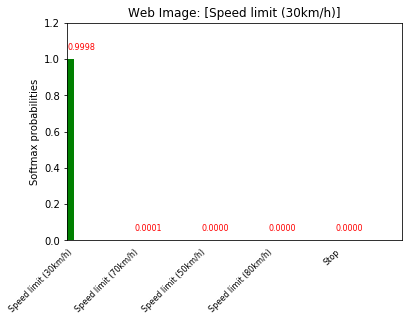

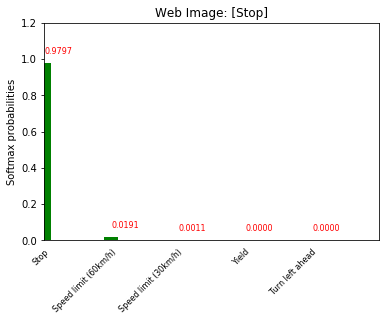

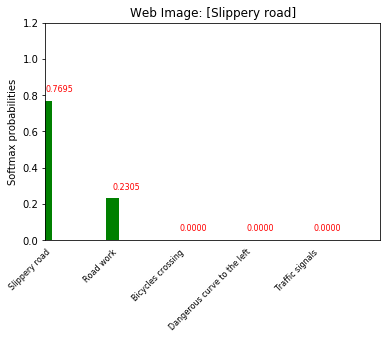

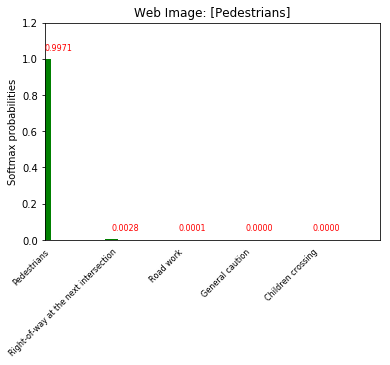

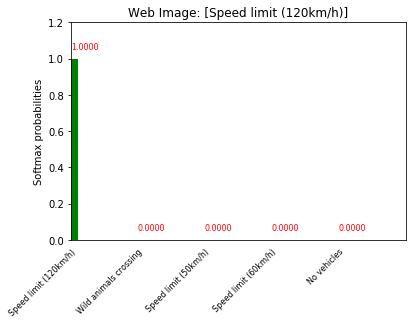

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
k_val = 5
with tf.Session() as sess:
    saver.restore(sess, model)
    sess = tf.get_default_session()
    top_k = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = k_val), {x: preprocess_X_web, y: y_web, keep_prob: 1.0})
    print(top_k)

softmax_values = top_k.values
top_k_predictions = top_k.indices

for i, (softmax_value, top_k_prediction) in enumerate(zip(softmax_values, top_k_predictions)):
    fig, ax = plt.subplots()
    plt.axis([0, k_val, 0, 1.2])
    plt.title("Web Image: [" + y_names[y_web[i]] + "]")
    plt.tick_params(bottom='off')
    ax.set_ylabel('Softmax probabilities')
    ax.set_xticklabels([y_names[p] for p in top_k_prediction], fontsize=8, wrap=True, rotation=45, ha='right')
    bars = ax.bar(np.arange(X_web.shape[0]), softmax_value, 1.0/k_val, color='g')
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + bar.get_width()/5,"%.4f" % height, ha='left', va='bottom', fontsize=8, color='r')

plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 